# **Regresión lineal simple/multiple**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df = pd.read_csv("CO2_Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape

(7385, 12)

In [6]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [7]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Implementación OLS

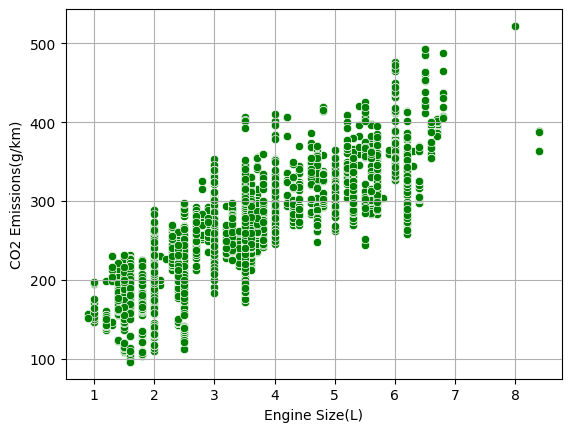

In [9]:
sns.scatterplot(x=df["Engine Size(L)"],y=df["CO2 Emissions(g/km)"],color="green")
plt.grid()

In [10]:
x = df["Engine Size(L)"]
y = df["CO2 Emissions(g/km)"]
x = sm.add_constant(x)

In [11]:
model = sm.OLS(y,x)
model = model.fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.724
Model:                             OLS   Adj. R-squared:                  0.724
Method:                  Least Squares   F-statistic:                 1.941e+04
Date:                 Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                         01:40:05   Log-Likelihood:                -35770.
No. Observations:                 7385   AIC:                         7.154e+04
Df Residuals:                     7383   BIC:                         7.156e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            134.3659      0.9

In [12]:
print(model.params)

const             134.365893
Engine Size(L)     36.777315
dtype: float64


In [13]:
ypred = 134.365893 + 36.777315*(df["Engine Size(L)"])

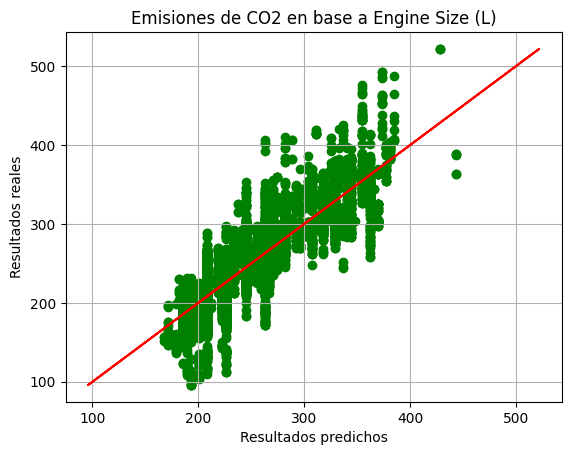

In [14]:
plt.scatter(ypred,y,color="green")
plt.plot(y,y, color="red")
plt.xlabel("Resultados predichos")
plt.ylabel("Resultados reales")
plt.title("Emisiones de CO2 en base a Engine Size (L)")
plt.grid()

## Evaluación de las variables en relación a la variable de respuesta

In [16]:
xs = ['Engine Size(L)', 'Cylinders',
      'Fuel Consumption City (L/100 km)',
      'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
      'Fuel Consumption Comb (mpg)']

for i in xs:
  xi = df[i]
  xi = sm.add_constant(xi)
  m_i = sm.OLS(y,xi)
  m_i = m_i.fit()
  print("R^2 de",i,":",m_i.rsquared)
  print("Coeficientes:",m_i.params.to_numpy())

R^2 de Engine Size(L) : 0.7244472046524082
Coeficientes: [134.36589272  36.77731519]
R^2 de Cylinders : 0.6932953649936133
Coeficientes: [100.95691469  26.64772433]
R^2 de Fuel Consumption City (L/100 km) : 0.8456503198972763
Coeficientes: [57.5599026  15.37245896]
R^2 de Fuel Consumption Hwy (L/100 km) : 0.7806357669286315
Coeficientes: [40.44858137 23.24075939]
R^2 de Fuel Consumption Comb (L/100 km) : 0.8428186895623988
Coeficientes: [46.76315222 18.57131902]
R^2 de Fuel Consumption Comb (mpg) : 0.8234224657110062
Coeficientes: [452.35303635  -7.341929  ]


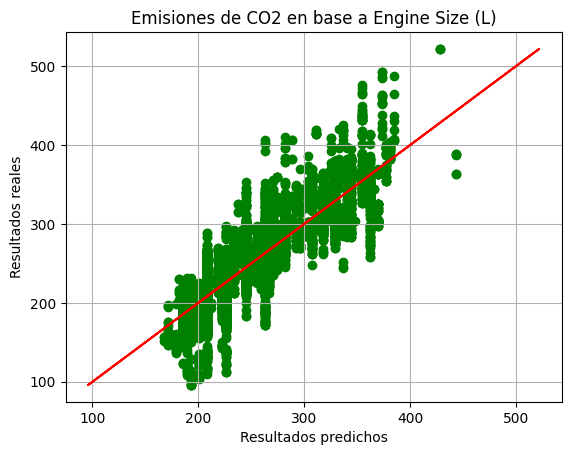

In [17]:
ypred = 134.36589272 + 36.77731519*df[xs[0]]
plt.scatter(ypred,y,color="green")
plt.plot(y,y, color="red")
plt.xlabel("Resultados predichos")
plt.ylabel("Resultados reales")
plt.title("Emisiones de CO2 en base a Engine Size (L)")
plt.grid()

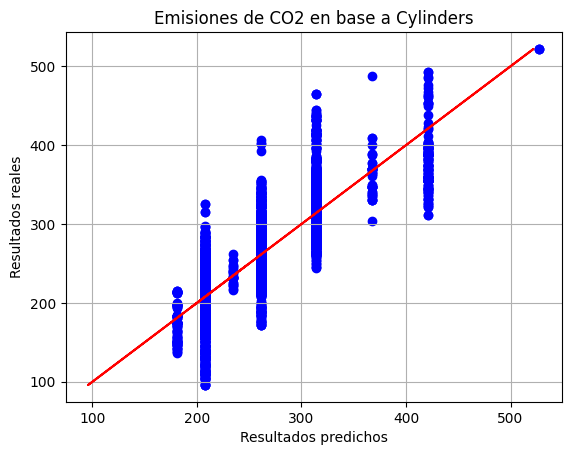

In [18]:
ypred = 100.95691469 + 26.64772433*df[xs[1]]
plt.scatter(ypred,y,color="blue")
plt.plot(y,y, color="red")
plt.xlabel("Resultados predichos")
plt.ylabel("Resultados reales")
plt.title("Emisiones de CO2 en base a Cylinders")
plt.grid()

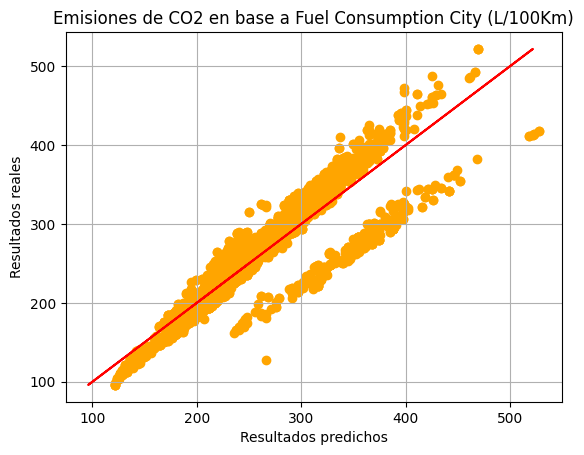

In [19]:
ypred = 57.5599026  + 15.37245896*df[xs[2]]
plt.scatter(ypred,y,color="orange")
plt.plot(y,y, color="red")
plt.xlabel("Resultados predichos")
plt.ylabel("Resultados reales")
plt.title("Emisiones de CO2 en base a Fuel Consumption City (L/100Km)")
plt.grid()

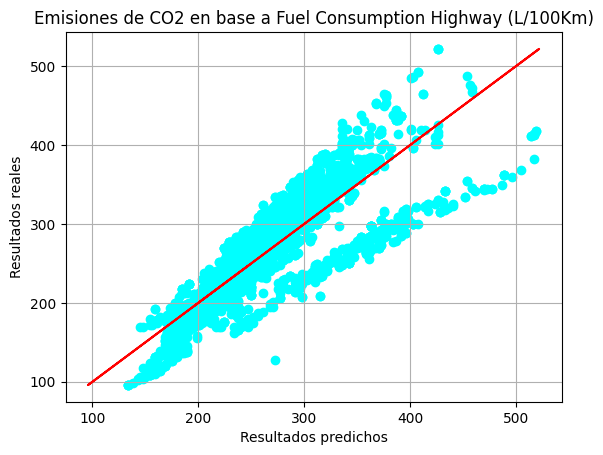

In [20]:
ypred = 40.44858137 + 23.24075939*df[xs[3]]
plt.scatter(ypred,y,color="cyan")
plt.plot(y,y, color="red")
plt.xlabel("Resultados predichos")
plt.ylabel("Resultados reales")
plt.title("Emisiones de CO2 en base a Fuel Consumption Highway (L/100Km)")
plt.grid()

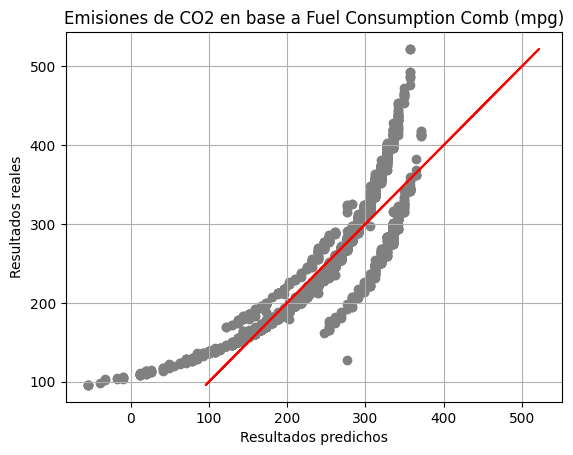

In [21]:
ypred = 452.35303635 - 7.341929*df[xs[5]]
plt.scatter(ypred,y,color="gray")
plt.plot(y,y, color="red")
plt.xlabel("Resultados predichos")
plt.ylabel("Resultados reales")
plt.title("Emisiones de CO2 en base a Fuel Consumption Comb (mpg)")
plt.grid()

**¿Cuáles son las características que más influyen en la emisión de CO2?**
> De acuerdo con los resultados de experimentar con cada una de las variables predictorass con respecto a las emisiones de CO2 de los vehículos, las características que más influyen en estas emisiones son el consumo de combustible en la ciudad y el consumo de gasolina tanto en ciudad como en carretera, ambos con un coeficiente de R^2 del 0.84, aproximadamente, seguido de el consumo de combustible combinado pero medido en Millas/Galón con un 0.82, mientras que las otras dos características anteriores fueron en Litros por cada 100 kms.

**¿Habrá alguna diferencia en las emisiones de CO2 cuando el consumo de com- bustible para ciudad y carretera se consideren por separado?**
> La diferencia de emisiones de CO2 cuando es en ciudad y en carretera sí existe, debido a que en carretera los vehículos van a una velocidad constante y no hay frenos tan frecuentemente, lo que hace que se consuma menor cantidad de combustible y, por consecuencia, se generen menos emisiones de CO2, por lo que esto podría incluso tomarse en cuenta para buscar un mejor modelo que sea más preciso para poder modelar las emisiones de dióxido de carbono de cada uno de los vehículos.

## Análisis de Residuos

In [23]:
x3 = df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']]
x3 = sm.add_constant(x3)
model = sm.OLS(y,x3)
model = model.fit()
influence = model.get_influence()
print("R^2:",model.rsquared)
print("Coeficientes:",model.params.to_numpy())
print("Residuos estandarizados:",influence.resid_studentized_internal)

R^2: 0.8676079886250416
Coeficientes: [215.13133143   6.02836975   4.12270173  -3.11076656]
Residuos estandarizados: [-0.5260348  -0.51732895  0.45556152 ... -0.19426804 -0.05878026
 -0.18365502]


In [24]:
ypred = model.predict(x3)

Text(0.5, 1.0, 'Análisis de residuos del modelo')

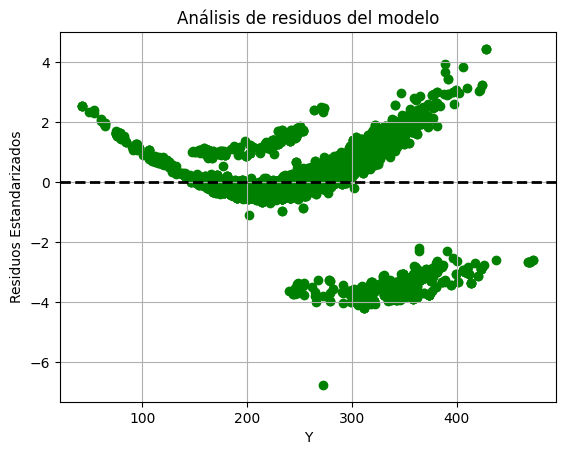

In [25]:
sr = influence.resid_studentized_internal
plt.scatter(ypred,sr, color="green")
plt.xlabel("Y")
plt.ylabel("Residuos Estandarizados")
plt.grid()
plt.axhline(y=0,color="black",linestyle="--",linewidth=2)
plt.title("Análisis de residuos del modelo")

Text(0.5, 0, 'Cuartiles teóricos')

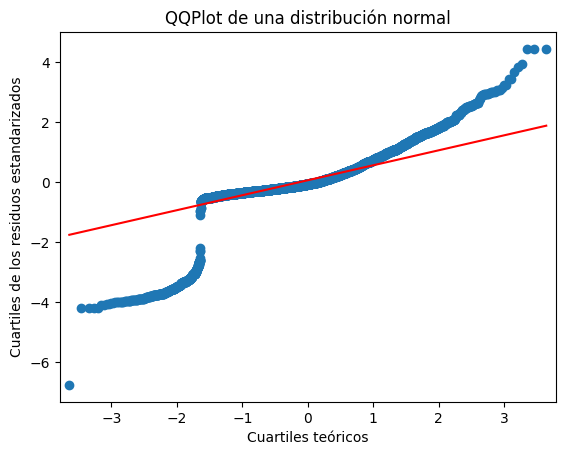

In [26]:
from scipy.stats import norm, uniform, skewnorm
fig = sm.qqplot(sr,dist=norm,line="q")
plt.title("QQPlot de una distribución normal")
plt.ylabel("Cuartiles de los residuos estandarizados")
plt.xlabel("Cuartiles teóricos")

Text(0.5, 0, 'Cuartiles teóricos')

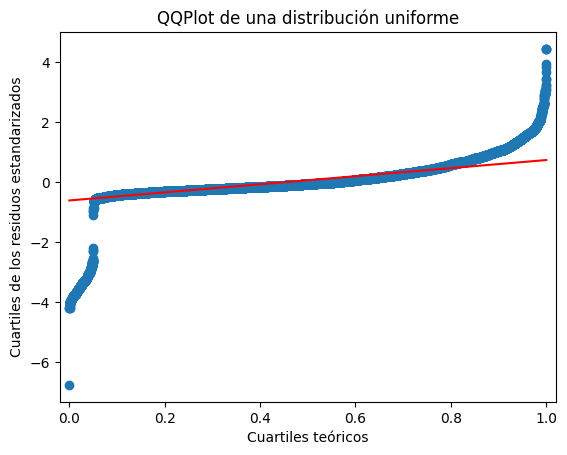

In [27]:
fig = sm.qqplot(sr,dist=uniform,line="q")
plt.title("QQPlot de una distribución uniforme")
plt.ylabel("Cuartiles de los residuos estandarizados")
plt.xlabel("Cuartiles teóricos")

Text(0.5, 0, 'Cuartiles teóricos')

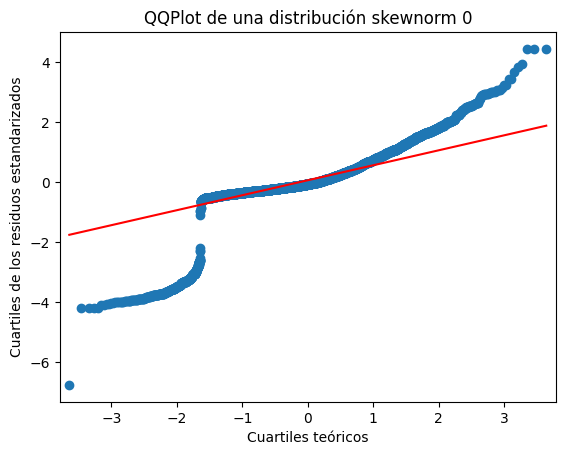

In [29]:
fig = sm.qqplot(sr,dist=skewnorm(0),line="q")
plt.title("QQPlot de una distribución skewnorm 0")
plt.ylabel("Cuartiles de los residuos estandarizados")
plt.xlabel("Cuartiles teóricos")

Text(0.5, 0, 'Cuartiles teóricos')

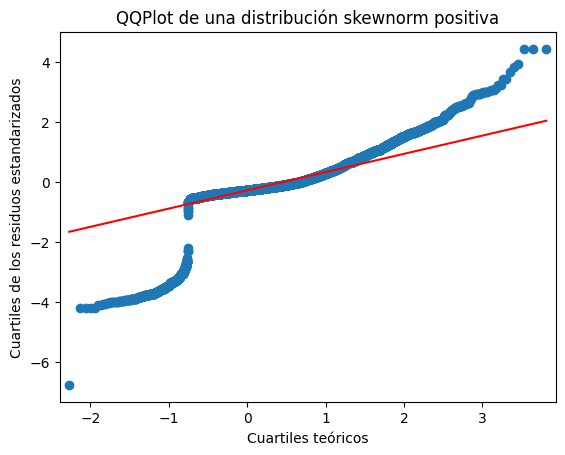

In [30]:
fig = sm.qqplot(sr,dist=skewnorm(1),line="q")
plt.title("QQPlot de una distribución skewnorm positiva")
plt.ylabel("Cuartiles de los residuos estandarizados")
plt.xlabel("Cuartiles teóricos")

Text(0.5, 0, 'Cuartiles teóricos')

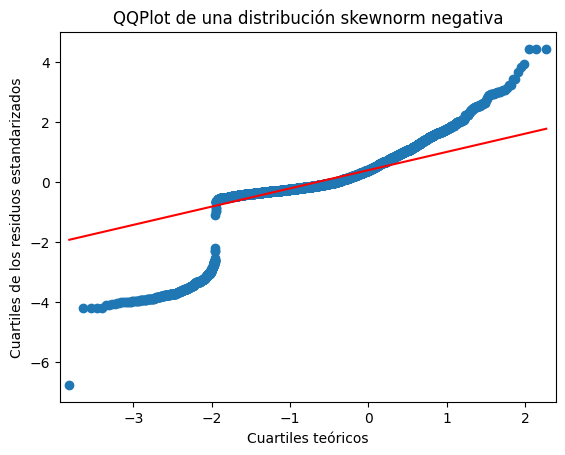

In [31]:
fig = sm.qqplot(sr,dist=skewnorm(-1),line="q")
plt.title("QQPlot de una distribución skewnorm negativa")
plt.ylabel("Cuartiles de los residuos estandarizados")
plt.xlabel("Cuartiles teóricos")

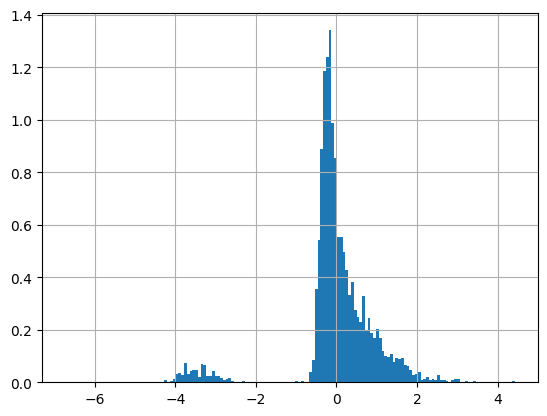

In [33]:
plt.hist(sr, bins="auto", histtype="stepfilled", density=True)
plt.grid()

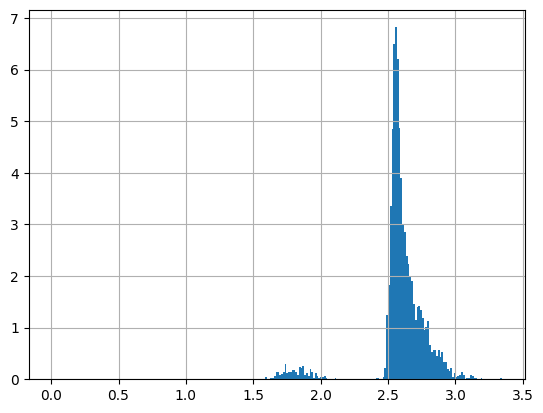

In [35]:
sr_transformados = np.sqrt(sr + abs(min(sr)))
plt.hist(sr_transformados, bins="auto", histtype="stepfilled", density=True)
plt.grid()

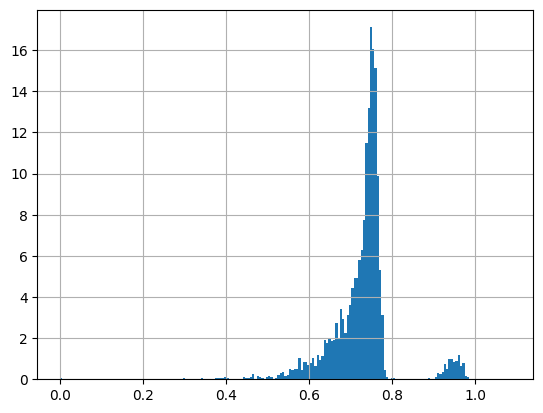

In [36]:
sr_log = sr + abs(min(sr))
sr_log = np.log10(1 + max(sr_log) - sr_log)
plt.hist(sr_log, bins="auto", histtype="stepfilled", density=True)
plt.grid()

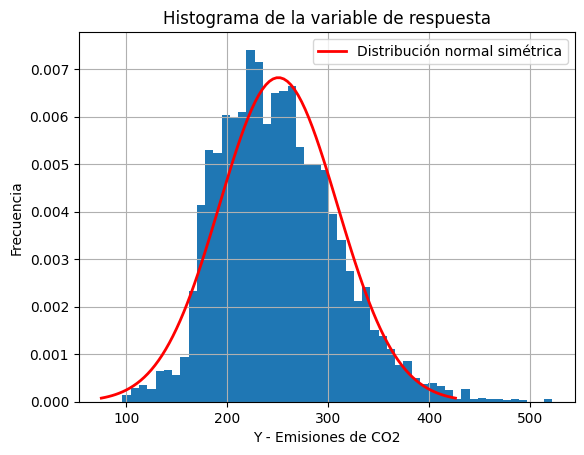

In [39]:
plt.hist(y,bins="auto", histtype="stepfilled", density=True)
mu, sigma = np.mean(y), np.std(y)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, 'r-', linewidth=2, label="Distribución normal simétrica")
plt.title("Histograma de la variable de respuesta")
plt.xlabel("Y - Emisiones de CO2")
plt.ylabel("Frecuencia")
plt.grid()
plt.legend()

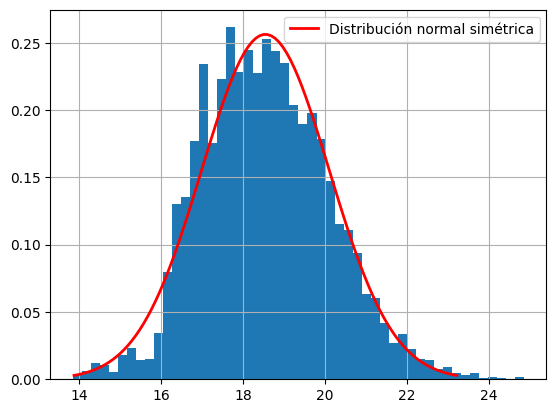

In [40]:
y_transformed = np.sqrt(y + abs(min(y)))
mu, sigma = np.mean(y_transformed), np.std(y_transformed)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, 'r-', linewidth=2, label="Distribución normal simétrica")
plt.hist(y_transformed, bins="auto", histtype="stepfilled", density=True)
plt.grid()
plt.legend()

In [41]:
x3 = df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']]
x3 = sm.add_constant(x3)
model_transformed = sm.OLS(y_transformed,x3)
model_transformed = model_transformed.fit()
influence_t = model_transformed.get_influence()
print("R^2:",model_transformed.rsquared)
print("Coeficientes:",model_transformed.params.to_numpy())
print("Residuos estandarizados:",influence_t.resid_studentized_internal)

R^2: 0.8826157052842744
Coeficientes: [19.10900399  0.14029753  0.06731676 -0.11126992]
Residuos estandarizados: [-0.5815652  -0.55348524  0.42129221 ... -0.20480777 -0.01719725
 -0.18870728]


In [42]:
y_predt = model_transformed.predict(x3)

Text(0.5, 1.0, 'Análisis de residuos del modelo')

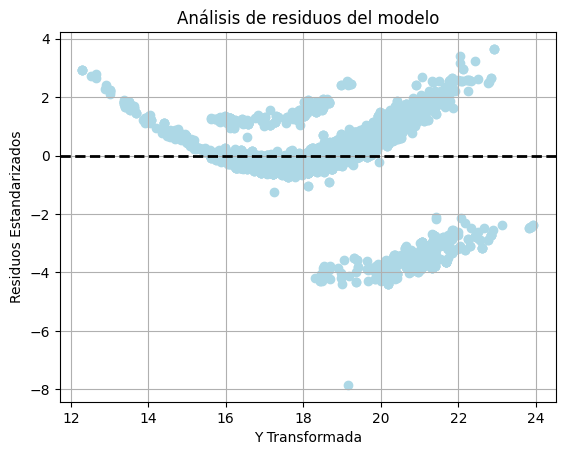

In [43]:
sr2 = influence_t.resid_studentized_internal
plt.scatter(y_predt,sr2, color="lightblue")
plt.xlabel("Y Transformada")
plt.ylabel("Residuos Estandarizados")
plt.grid()
plt.axhline(y=0,color="black",linestyle="--",linewidth=2)
plt.title("Análisis de residuos del modelo")

Text(0.5, 0, 'Cuartiles teóricos')

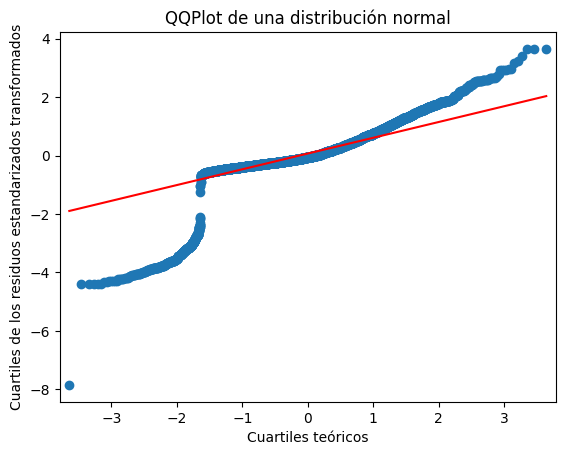

In [44]:
fig = sm.qqplot(sr2,dist=norm,line="q")
plt.title("QQPlot de una distribución normal")
plt.ylabel("Cuartiles de los residuos estandarizados transformados")
plt.xlabel("Cuartiles teóricos")

Text(0.5, 0, 'Cuartiles teóricos')

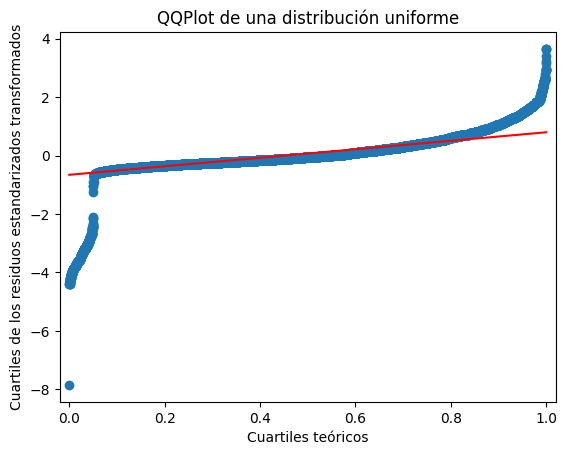

In [45]:
fig = sm.qqplot(sr2,dist=uniform,line="q")
plt.title("QQPlot de una distribución uniforme")
plt.ylabel("Cuartiles de los residuos estandarizados transformados")
plt.xlabel("Cuartiles teóricos")

Text(0.5, 0, 'Cuartiles teóricos')

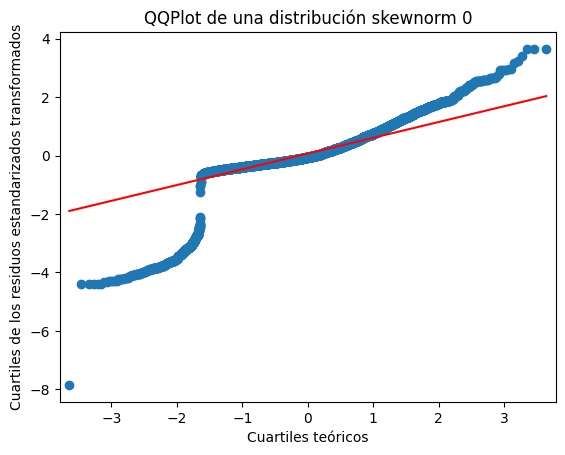

In [46]:
fig = sm.qqplot(sr2,dist=skewnorm(0),line="q")
plt.title("QQPlot de una distribución skewnorm 0")
plt.ylabel("Cuartiles de los residuos estandarizados transformados")
plt.xlabel("Cuartiles teóricos")

**Busca una transformación adecuada de la variables respuesta para que su dis- tribución sea lo más simétrica posible**
>La transformación que obtuvo que los datos de la variable de respuesta fueran lo más simétricos posibles fue la de la implementación por raíz cuadrada de todos los valores positivos.

**Compara la distribución de antes y después (Grafica la dispersión de “Valor predicho” vs “Residuos student-rizados”) de la transformación**
> Al observar la nueva gráfica de Valor predicho vs los residuos, se puede observar que los resultados fueron mejores con la variable de respuesta transformada, haciendo que más de los residuos se encontraran cercanos a 0.

**Realiza nuevamente el análisis de residuos (QQ Plot) con la transformación**
> Los QQ-Plot también muestran una mejor pertenencia a una distribución normal y a una dis- tribución uniforme, indicando que la transformación contribuyó positivamente a estandarizar los datos.

## Interpretación de la Regresión Lineal

In [47]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.868
Model:                             OLS   Adj. R-squared:                  0.868
Method:                  Least Squares   F-statistic:                 1.612e+04
Date:                 Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                         01:52:50   Log-Likelihood:                -33064.
No. Observations:                 7385   AIC:                         6.614e+04
Df Residuals:                     7381   BIC:                         6.616e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [49]:
x = df[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)"]]
x = sm.add_constant(x)
modelo_final = sm.OLS(y_transformed, x)
modelo_final = modelo_final.fit()
print(modelo_final.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.915
Model:                             OLS   Adj. R-squared:                  0.915
Method:                  Least Squares   F-statistic:                 1.328e+04
Date:                 Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                         01:53:25   Log-Likelihood:                -4635.1
No. Observations:                 7385   AIC:                             9284.
Df Residuals:                     7378   BIC:                             9333.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [50]:
x = df[["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (mpg)"]]
x = sm.add_constant(x)
modelo_final = sm.OLS(y_transformed, x)
modelo_final = modelo_final.fit()
print(modelo_final.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.915
Model:                             OLS   Adj. R-squared:                  0.915
Method:                  Least Squares   F-statistic:                 1.593e+04
Date:                 Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                         01:53:41   Log-Likelihood:                -4635.1
No. Observations:                 7385   AIC:                             9282.
Df Residuals:                     7379   BIC:                             9324.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [51]:
x = df[["Engine Size(L)", "Cylinders","Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (mpg)"]]
x = sm.add_constant(x)
modelo_final = sm.OLS(y_transformed, x)
modelo_final = modelo_final.fit()
print(modelo_final.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.915
Model:                             OLS   Adj. R-squared:                  0.915
Method:                  Least Squares   F-statistic:                 1.991e+04
Date:                 Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                         01:53:53   Log-Likelihood:                -4636.1
No. Observations:                 7385   AIC:                             9282.
Df Residuals:                     7380   BIC:                             9317.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


In [52]:
influence_t_final = modelo_final.get_influence()
print("R^2:",modelo_final.rsquared)
print("Coeficientes:",modelo_final.params.to_numpy())
print("Residuos estandarizados:",influence_t_final.resid_studentized_internal)

R^2: 0.9152103349606883
Coeficientes: [19.36763566  0.13132974  0.18303665  0.10784442 -0.11767564]
Residuos estandarizados: [-0.25076434 -0.06239508 -0.09337724 ...  0.48004602  0.58626641
  0.67521799]


In [53]:
ypred_final = modelo_final.predict(x)
srfinal = influence_t_final.resid_studentized_internal

Text(0.5, 1.0, 'Análisis de residuos del modelo')

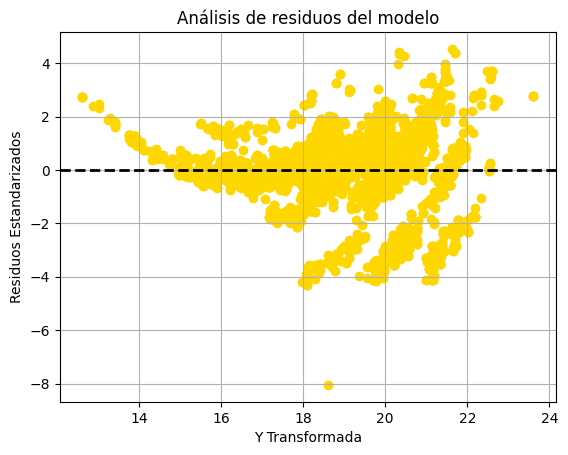

In [54]:
plt.scatter(ypred_final, srfinal, color="gold")
plt.xlabel("Y Transformada")
plt.ylabel("Residuos Estandarizados")
plt.grid()
plt.axhline(y=0,color="black",linestyle="--",linewidth=2)
plt.title("Análisis de residuos del modelo")

Text(0.5, 0, 'Cuartiles teóricos')

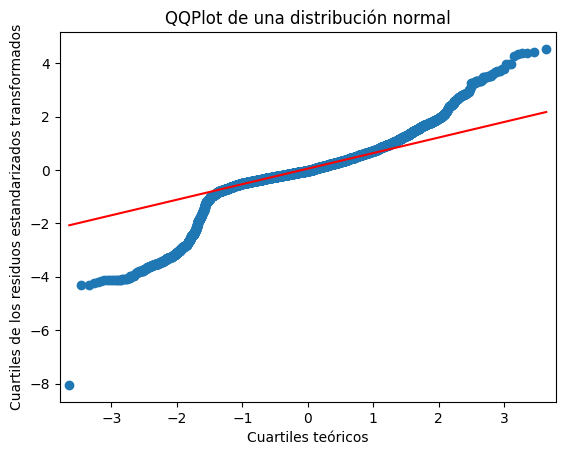

In [55]:
fig = sm.qqplot(srfinal,dist=norm,line="q")
plt.title("QQPlot de una distribución normal")
plt.ylabel("Cuartiles de los residuos estandarizados transformados")
plt.xlabel("Cuartiles teóricos")

Text(0.5, 0, 'Cuartiles teóricos')

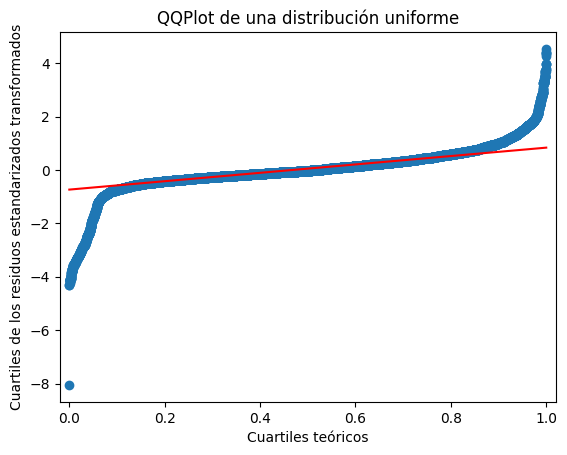

In [56]:
fig = sm.qqplot(srfinal,dist=uniform,line="q")
plt.title("QQPlot de una distribución uniforme")
plt.ylabel("Cuartiles de los residuos estandarizados transformados")
plt.xlabel("Cuartiles teóricos")

**¿El modelo puede realizar un mejor fit?**
> Después de haber transformado los datos y haber tomado en cuenta todas las variables indepen- dientes, se pudo observar que el modelo mejoró de un 0.88 a un 0.915 de puntaje de R^2. Sin embargo, después de haber eliminado las variables independientes que no eran significativas para el modelo, no hubo más incremento en este valor.

**Revisa gráfico del error (Predichos vs Residuos estandarizados)**
> El gráfico de error demuestra que el modelo es mejor a los anteriores, debido a que los residuos están cada vez más concentrados hacia 0, y hay una mayor cantidad de valores que se concentran hacia esta línea.

**Evalúe las distintas variabless independientes**
> Después de haber realizado el modelo con todas las variables independientes, se pudo ver que había dos variables que no eran significativas para el modelo: Fuel Consumption City (L/100 km) y Fuel Consumption Comb (L/100 km). Estas dos variables fueron removidas del modelo, pero no se logró obtener mejoría en la precisión de los resultados.

**¿Qué pasa con la distribución de los datos? ¿Importancia de las variables? ¿Qué se podría hacer para mejorar?**
> Después de haber transformado la variable de respuesta, se puede observar que los datos se aco- modan de mejor forma a una distribución normal simétrica. Esto quiere decir que los resultados obtenidos deberían asimilarse a este mismo tipo de distribución. Sin embargo, el resto de variables (Independientes) no fueron transformadas, lo que pudo haber tenido que ver con los resultados obtenidos.
En cuanto a la importancia de las variables, se pudo ver que casi todas las variables independi- entes tenían significancia, menos las dos que se mencionaron previamente, y en cuanto hicimos el procedimiento de backwards al eliminar las variables buscamos si la medida de R2 cambiaba pero esta se mantuvo en el valor 0.9152103349606883.
Para poder intentar mejorar el modelo, se podrían seguir transformando los datos hasta que la variable de respuesta siguiera una distribución simétrica a mayor detalle, además de intentar es- tandarizar o normalizar también las variables independientes. Sin embargo, estos procesos tampoco traerían una mejoría significativa a los resultados. Sin embargo, esos métodos y varios otros podrían implementarse para buscar encontrar el modelo óptimo para este conjunto de datos.